In [1]:
import nltk
from nltk.corpus import twitter_samples # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt
import random

### About the Twitter dataset

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial. 

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\udayr\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
# all_positive_tweets
all_negative_tweets=twitter_samples.strings('negative_tweets.json')
# all_negative_tweets

In [4]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nType of all_postive_tweets: ', type(all_positive_tweets))
print('Type of a tweet entry: ', type(all_positive_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

Type of all_postive_tweets:  <class 'list'>
Type of a tweet entry:  <class 'str'>


Creating pie chart to visualize data

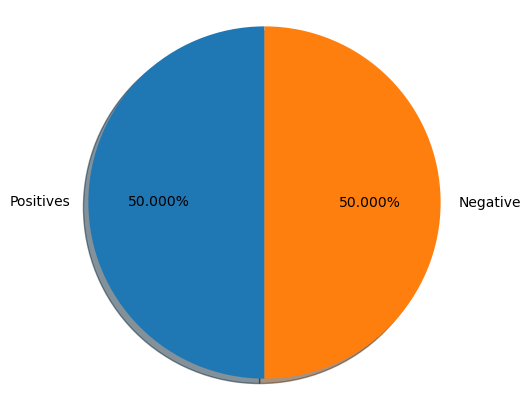

In [5]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

labels='Positives', 'Negative'

sizes=[len(all_positive_tweets), len(all_negative_tweets)] # depicts the number of tweets in each category

#  Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.3f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()


In [6]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@JusstSmilee long story :p
@kazonomics @CNBC Man they told me to buy gold all the way down from 1900.. and now they tell me to sell :( ?


## Precprocessing raw text
 It includes cleaning and formatting the data before feeding into a machine learning algorithm. Here, I used the following steps:

 - Tokenizing the string
 - lowercasing
 - removing stop words and punctuation
 - stemming

In [7]:
tweet=all_positive_tweets[2277]
tweet

'My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i'

In [8]:
nltk.download('stopwords') # download the stopwords from NLTK

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\udayr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import re    # library for regular expression operations
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer #  a stemming library from NLTK
from nltk.tokenize import TweetTokenizer # a tweet tokenizer from NLTK

In [10]:
print('\033[92m' + tweet)
# print('\033[94m'+tweet)

tweet2=re.sub(r'^RT[\s]+', '', tweet) # remove old style retweet text "RT"
# tweet2
tweet2=re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2) # remove hyperlinks

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### Tokenize and lowercasing the string
To tokenize means to split the strings into individual words without blanks or tabs. 

In [11]:
print('\033[92m' + tweet2)
print('\033[94m\n')

'''
preserve_case=False converts everything to lowercase
strip_handles=True removes @mentions, reduce_len=True reduces the length of the words
reduce_len=True reduces the length of the words (replaces repeated characters with the character itself twice)
'''
tokenizer=TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True) 

tweet_tokens=tokenizer.tokenize(tweet2)

print(f'Tokenized string:\n {tweet_tokens}')

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
 ['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


## Removing stopwords and punctuation
Stop words are words that don't add significant meaning to the text.

In [12]:
stopwords_english=stopwords.words('english') # load the list of stopwords
# len(stopwords_english)

print(f'Stop words\n {stopwords_english}')
print(f'Punctuation\n {string.punctuation}')

Stop words
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

We can see that the stop words list above contains some words that could be important in some contexts. These could be words like i, not, between, because, won, against. You might need to customize the stop words list for some applications. For this exercise, we will use the entire list.

For the punctuation, we saw earlier that certain groupings like ':)' and '...' should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed.

Time to clean up our tokenized tweet!

In [13]:
print('\033[92m')
print(tweet_tokens)
print('\033[94m') # to reset the color to default

tweets_clean=[]
for word in tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation):
        tweets_clean.append(word)
        
print('removed stop words and punctuation:')
print(tweets_clean)


['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


## Stemming
Converts a word to its base form. E.g learn, learned, learnt, learning are converted to learn

However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, happi and sunni. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

- happy
- happiness
- happier


We can see that the prefix happi is more commonly used. We cannot choose happ because it is the stem of unrelated words like happen.

In [14]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

stemmer=PorterStemmer()
tweets_stem=[]

for word in tweets_clean:
    stem_word=stemmer.stem(word) # stemming word
    tweets_stem.append(stem_word)

print(f'stemmed words:\n {tweets_stem}')



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
 ['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [17]:
from utils import process_tweet # Import the process_tweet function

# choose the same tweet
tweet = all_positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
